# Bank Loan Status Prediction

### Brandon Lotus
#### - _Data Cleaning and Preprocessing_
#### - _Data Analysis and Visualization_ 

_Sumber dataset: https://www.kaggle.com/zaurbegiev/my-dataset_

Meningkatnya pengajuan pinjaman di bank dapat mengakibatkan masalah karena memiliki resiko yaitu Non-performing loan (NPL) atau kredit macet. NPL adalah suatu keadaan dimana debitur baik perorangan atau perusahaan tidak mampu membayar kredit bank tepat pada waktunya. NPL masih menjadi masalah utama di sektor perbankan dalam kurun waktu beberapa dekade terakhir.

Penyebab paling sering tingginya NPL adalah kegagalan bank untuk mengidentifikasi serta memberikan keputusan debitur mana yang pantas dan mampu diberikan pinjaman.

Di sisi lain, bank yang terlalu mengejar target penyaluran kredit menyebabkan pihak bank kurang memperhatikan aspek analisis kredit, seperti pengelolaan informasi yang kurang baik, kurang efektifnya kebijakan dalam pemberian kredit, dan SOP analisis kredit yang buruk.

Dataset yang digunakan adalah 'Bank Loan Status Dataset' dari Kaggle yang berisi data historis peminjaman dari suatu bank. Data peminjaman merupakan pinjaman yang sudah ditutup baik karena jatuh tempo untuk pinjaman telah dilunasi atau charged off (ketika bank telah menentukan bahwa peminjam tidak akan pernah melunasi pinjaman mereka).

### Problems

1. Apakah faktor-faktor yang dapat mengidentifikasi peminjam yang bisa / tidak melunasi pinjamannya?
2. Bagaimana mengurangi resiko kerugian bank yang disebakan oleh peminjam yang tidak melunasi pinjamannya?

### Goals

1. Mengidentifikasi faktor-faktor seorang peminjam bisa / tidak melunasi pinjamannya.
2. Membuat model untuk memprediksi apakah peminjam akan membayar kembali pinjamannya berdasarkan fitur target 'Loan Status' dalam dataset.

## Data Cleaning and Preprocessing

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [90]:
df = pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709,1167493,8 years,Home Mortgage,Home Improvements,5215,17,nan,6,1,228190,416746,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33296,21,8,35,0,229976,850784,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29201,15,29,18,1,297996,750090,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721,806949,3 years,Own Home,Debt Consolidation,8742,12,nan,9,0,256329,386958,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20640,6,nan,15,0,253460,427174,0,0


- Loan ID: A unique Identifier for the loan information.
- Customer ID: A unique identifier for the customer. Customers may have more than one loan.
- Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
- Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
- Term: A categorical variable indicating if it is a short term or long term loan.
- Credit Score: The customer's credit score indicating the riskiness of the borrowers credit history. Type of credit score is not specified.
- Annual Income: The customer's annual income
- Years in current job: A categorical variable indicating how many years the customer has been in their current job.
- Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
- Purpose: A description of the purpose of the loan.
- Monthly Debt: The customer's monthly payment for their existing loans
- Years of Credit History: The years since the first entry in the customer’s credit history
- Months since last delinquent: Months since the last loan delinquent payment. Delinquency is not defined, but is usually 60 or 90 days overdue.
- Number of Open Accounts: The total number of open credit accounts (inclusive of all accounts outside of this lending institution).
- Number of Credit Problems: The number of credit problems in the customer records.
- Current Credit Balance: The current total debt for the customer
- Maximum Open Credit: The maximum credit limit for all credit sources.
- Bankruptcies: The number of bankruptcies
- Tax Liens: The number of tax liens.

In [5]:
df.shape

# Jumlah keseluruhan data (19 kolom dan 100 ribu baris data)

(100514, 19)

In [3]:
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = bankDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Loan ID,object,514,1,81999,"[8236d82a-5679-40e7-b22a-07ec137ce399, 0565e42..."
1,Customer ID,object,514,1,81999,"[0fbe9c43-c7c2-40b3-aa9c-435ab6b0bde8, 916131c..."
2,Loan Status,object,514,1,2,"[nan, Fully Paid]"
3,Current Loan Amount,float64,514,1,22004,"[605902.0, 227524.0]"
4,Term,object,514,1,2,"[Short Term, Long Term]"
5,Credit Score,float64,19668,20,324,"[610.0, 724.0]"
6,Annual Income,float64,19668,20,36174,"[414295.0, 1914554.0]"
7,Years in current job,object,4736,5,11,"[7 years, 2 years]"
8,Home Ownership,object,514,1,4,"[Rent, nan]"
9,Purpose,object,514,1,16,"[renewable_energy, moving]"


In [3]:
df.dtypes

# 7 kolom tipe object, kolom lainnya tipe data float

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [6]:
df.isna().sum()

# terdapat cukup banyak missing values dalam dataset

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

### Checking Data Duplicates

In [4]:
df.nunique()

# data unik loan ID hanya 81999 data, yang menandakan ada data duplikat pada dataset
# data unik load ID dan customer ID sama, yang menandakan setiap customer hanya memiliki 1 loan

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [91]:
df.drop_duplicates(subset = 'Loan ID', keep = 'first', inplace = True)
df.shape

# drop data duplikat dalam dataset (baris data menjadi 82 ribu)

(82000, 19)

In [92]:
df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)
df.shape

# drop kolom loan ID dan customer ID karena data tidak berhubungan dengan tujuan project

(82000, 17)

### Handling Abnormal Data

In [50]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.describe()

# dari deskripsi data, terlihat ada data yang mencurigakan
# nilai max current loan amount 99999999
# nilai max credit score 7510 (range credit score yang umum menurut fico scoring 300-850)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,81999,64968,64968,81999,81999,37378,81999,81999,81999,81997,81824,81991
mean,12086403,1168,1376776,18331,18,35,11,0,293620,793536,0,0
std,32179533,1633,1121542,12128,7,22,5,0,372615,9208747,0,0
min,10802,585,76627,0,4,0,0,0,0,0,0,0
25%,179256,711,847305,10118,14,16,8,0,113316,280456,0,0
50%,307780,731,1169592,16075,17,32,10,0,209931,477774,0,0
75%,519453,743,1649438,23811,22,51,14,0,366994,798490,0,0
max,99999999,7510,165557393,435843,70,176,76,15,32878968,1539737892,7,15


In [93]:
df.drop(df.index[df['Current Loan Amount'] == 99999999], inplace = True)
df.drop(df.index[df['Credit Score'] > 850], inplace = True)
df.drop(df['Loan Status'][df['Loan Status'].isnull() == True].index, inplace=True)
df.shape

# drop data dengan current loan amount 99999999
# drop data dengan credit score lebih dari 850 (baris data menjadi 67 ribu)
# drop data yang terdapat missing value di kolom target loan status (hanya 1 data)

(67760, 17)

### Handling Missing Values

In [22]:
df.isna().sum()

# masih terdapat missing values di beberapa kolom
# jumlah missing values credit score dan annual income sama banyak

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    17031
Annual Income                   17031
Years in current job             2903
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    36678
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      142
Tax Liens                           7
dtype: int64

In [94]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

# karena jumlah missing values yang cukup banyak di kolom credit score dan annual income (25%)
# maka akan diisi dengan median (ada outlier pada kedua kolom data)

In [95]:
df.stb.freq(['Years in current job'], cum_cols = False)

# dari perbandingan data years in current job, terlihat 10+ years jauh lebih banyak (32%) dari kategori umur lainnya

,Years in current job,count,percent
0,10+ years,20896,32
1,2 years,6202,10
2,< 1 year,5595,9
3,3 years,5520,9
4,5 years,4656,7
5,1 year,4358,7
6,4 years,4185,6
7,6 years,3854,6
8,7 years,3758,6
9,8 years,3167,5


In [96]:
df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)

# mengisi missing values years in current job dengan modus (data kategorik)

In [97]:
df.drop(['Months since last delinquent'],axis=1,inplace=True)

# drop kolom months since last delinquent karena jumlah missing value terlalu banyak (54%)

In [98]:
df.drop(df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index, inplace=True)
df.drop(df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index, inplace=True)
df.drop(df['Tax Liens'][df['Tax Liens'].isnull() == True].index, inplace=True)

# sisa missing values pada kolom dengan persentase missing values sangat kecil
# drop missing value pada kolom maximum open credit (hanya 1 data)
# drop missing value pada kolom bankruptcies (hanya 0,2% data)
# drop missing value pada kolom tax liens (hanya 7 data)

In [99]:
df.isna().sum()

# sudah tidak ada missing value dalam dataset

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [57]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,67617,67617,67617,67617,67617,67617,67617,67617,67617,67617,67617
mean,306798,721,1324338,18375,18,11,0,293019,804424,0,0
std,182097,24,797424,12154,7,5,0,354430,10052296,0,0
min,15422,585,76627,0,4,0,0,0,0,0,0
25%,171116,715,953040,10143,14,8,0,113012,278784,0,0
50%,264814,726,1172718,16129,17,10,0,209532,475244,0,0
75%,426602,737,1457775,23857,22,14,0,366662,795784,0,0
max,789250,751,36475440,435843,70,76,15,12986956,1539737892,7,15


In [34]:
df.describe(include='O')

,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,67617,67617,67617,67617,67617
unique,2,2,11,4,16
top,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,49570,50331,23778,32916,53475


### Handling Similar Data Description

In [35]:
df['Home Ownership'].unique()

# terdapat 2 tipe home ownership yang bertipe sama, home mortgage dan havemortgage

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [36]:
df['Purpose'].unique()

# terdapat beberapa purpose yang bertujuan sama
# other dan Other
# take a trip dan vacation
# business loan dan small_business

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Buy a Car', 'Take a Trip', 'Other', 'Business Loan',
       'small_business', 'Medical Bills', 'vacation', 'major_purchase',
       'Educational Expenses', 'wedding', 'moving', 'renewable_energy'],
      dtype=object)

In [100]:
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')
df['Home Ownership'].unique()

# menyamakan kata havemortgage menjadi home mortgage

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [101]:
df['Purpose'] = df['Purpose'].replace({'other':'Other','small_business':'Business Loan','Take a Trip':'vacation'})
df['Purpose'].unique()

# menyamakan kata Other dengan other
# menyamakan kata small business dengan business loan
# menyamakan kata take a trip dengan vacation

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Buy a Car', 'vacation', 'Business Loan', 'Medical Bills',
       'major_purchase', 'Educational Expenses', 'wedding', 'moving',
       'renewable_energy'], dtype=object)

In [102]:
df.stb.freq(['Number of Credit Problems'], cum_cols = False)

# dari perbandingan jumlah number of credit problems, terlihat 0 jauh mendominasi (87%)

,Number of Credit Problems,count,percent
0,0,58508,87
1,1,7893,12
2,2,834,1
3,3,245,0
4,4,80,0
5,5,34,0
6,6,10,0
7,7,6,0
8,10,2,0
9,9,2,0


In [103]:
df.stb.freq(['Bankruptcies'], cum_cols = False)

# dari perbandingan jumlah bankruptcies, terlihat 0 jauh mendominasi (89%)

,Bankruptcies,count,percent
0,0,60394,89
1,1,6871,10
2,2,270,0
3,3,60,0
4,4,16,0
5,5,4,0
6,7,1,0
7,6,1,0


In [104]:
df.stb.freq(['Tax Liens'], cum_cols = False)

# dari perbandingan jumlah tax liens, terlihat 0 jauh mendominasi (98%)

,Tax Liens,count,percent
0,0,66387,98
1,1,852,1
2,2,235,0
3,3,77,0
4,4,40,0
5,5,10,0
6,6,6,0
7,7,4,0
8,9,3,0
9,15,1,0


In [105]:
df['Number of Credit Problems'] = np.where(df['Number of Credit Problems'] == 0, 0, 1)
df.rename(columns = {'Number of Credit Problems': 'Credit Problems'}, inplace=True)
df['Credit Problems'].value_counts()

# kolom number of credit problems dibuat menjadi 2 kategori (binary iya/tidak)
# nama kolom diganti menjadi credit problems

0    58508
1     9109
Name: Credit Problems, dtype: int64

In [118]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.7,17.2,6.0,1,228190.0,416746.0,1,0
1,Fully Paid,262328.0,Short Term,726.0,1172718.0,10,Home Mortgage,Debt Consolidation,33296.0,21.1,35.0,0,229976.0,850784.0,0,0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.9,12.0,9.0,0,256329.0,386958.0,0,0
4,Fully Paid,176220.0,Short Term,726.0,1172718.0,5,Rent,Debt Consolidation,20639.7,6.1,15.0,0,253460.0,427174.0,0,0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,0,Home Mortgage,Debt Consolidation,10855.1,19.6,13.0,1,122170.0,272052.0,1,0


In [106]:
df['Bankruptcies'] = np.where(df['Bankruptcies'] == 0, 0, 1)
df['Bankruptcies'].value_counts()

# kolom bankruptcies dibuat menjadi 2 kategori (binary iya/tidak)

0    60394
1     7223
Name: Bankruptcies, dtype: int64

In [107]:
df['Tax Liens'] = np.where(df['Tax Liens'] == 0, 0, 1)
df['Tax Liens'].value_counts()

# kolom bankruptcies dibuat menjadi 2 kategori (binary iya/tidak)

0    66387
1     1230
Name: Tax Liens, dtype: int64

### Handling Outliers

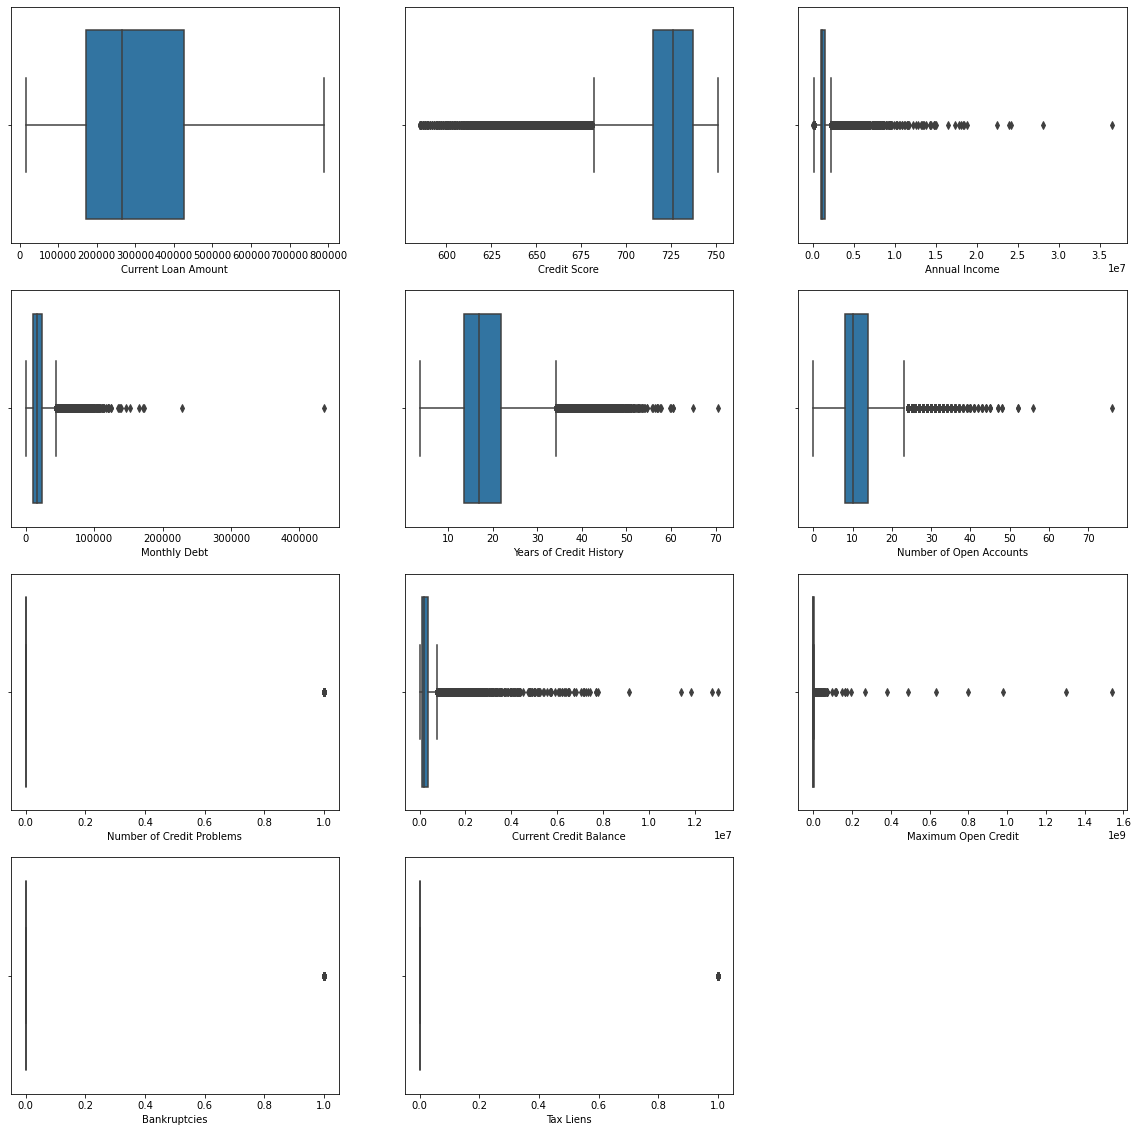

In [75]:
# Mengidentifikasi outliers dengan boxplot
plt.figure(figsize = (20, 20))
x = 1      
for i in df.describe():
    plt.subplot(4,3,x)
    sns.boxplot(df[i])
    x += 1

In [76]:
# Mengidentifikasi outliers dalam kolom 'Credit Scoree'
Q1_cs = df.describe()['Credit Score']['25%']
Q3_cs = df.describe()['Credit Score']['75%']
IQR_cs = Q3_cs - Q1_cs
upper_fence_cs = Q3_cs + (1.5 * IQR_cs)
lower_fence_cs = Q1_cs - (1.5 * IQR_cs)
out_cs = len(df[df['Credit Score'] < lower_fence_cs]) + len(df[df['Credit Score'] > upper_fence_cs])
per_cs = (out_cs / len(df)) * 100
print(f'Lower Fence Credit Score: {lower_fence_cs}')
print(f'Upper Fence Credit Score: {upper_fence_cs}')
print(f'Jumlah Outlier Credit Score: {out_cs} data ({per_cs})%')

# outliers berada pada credit score yang rendah
# outliers dipertahankan untuk mendapatkan analisis dari data credit score yang  rendah

Lower Fence Credit Score: 682.0
Upper Fence Credit Score: 770.0
Jumlah Outlier Credit Score: 5323 data (7.8722806394841545)%


In [74]:
# Mengidentifikasi outliers dalam kolom 'Annual Income'
Q1_ai = df.describe()['Annual Income']['25%']
Q3_ai = df.describe()['Annual Income']['75%']
IQR_ai = Q3_ai - Q1_ai
upper_fence_ai = Q3_ai + (1.5 * IQR_ai)
lower_fence_ai = Q1_ai - (1.5 * IQR_ai)
out_ai = len(df[df['Annual Income'] < lower_fence_ai]) + len(df[df['Annual Income'] > upper_fence_ai])
per_ai = (out_ai / len(df)) * 100
print(f'Lower Fence Annual Income: {lower_fence_ai}')
print(f'Upper Fence Annual Income: {upper_fence_ai}')
print(f'Jumlah Outlier Annual Income: {out_ai} data ({per_ai})%')

# outliers berada pada annual income yang tinggi

Lower Fence Annual Income: 195937.5
Upper Fence Annual Income: 2214877.5
Jumlah Outlier Annual Income: 5705 data (8.437227324489402)%


In [77]:
df['Annual Income'].sort_values(ascending=False).head(5)

# data max annual income mencurigakan karena jauh lebih tinggi dari dibawahnya

37858   36475440
58682   28095300
21598   24161540
25003   23980375
29203   22448880
Name: Annual Income, dtype: float64

In [78]:
df[df['Annual Income'] == df['Annual Income'].max()]

# data annual income tertinggi 36 juta namun tujuan peminjaman debt consolidation dengan jumlah loan 600 ribu

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
37858,Fully Paid,622402,Short Term,747,36475440,6 years,Own Home,Debt Consolidation,6383,11,7,0,263891,566896,0,0


In [79]:
df.drop(df.index[df['Annual Income'] == 36475440], inplace = True)

# drop data max annual income

In [80]:
# Mengidentifikasi outliers dalam kolom 'Monthly Debt'
Q1_md = df.describe()['Monthly Debt']['25%']
Q3_md = df.describe()['Monthly Debt']['75%']
IQR_md = Q3_md - Q1_md
upper_fence_md = Q3_md + (1.5 * IQR_md)
lower_fence_md = Q1_md - (1.5 * IQR_md)
out_md = len(df[df['Monthly Debt'] < lower_fence_md]) + len(df[df['Monthly Debt'] > upper_fence_md])
per_md = (out_md / len(df)) * 100
print(f'Lower Fence Monthly Debt: {lower_fence_md}')
print(f'Upper Fence Monthly Debt: {upper_fence_md}')
print(f'Jumlah Outlier Monthly Debt: {out_md} data ({per_md})%')

# outliers berada pada monthly debt yang tinggi

Lower Fence Monthly Debt: -10425.395
Upper Fence Monthly Debt: 44426.085
Jumlah Outlier Monthly Debt: 2300 data (3.4015617605300523)%


In [81]:
df['Monthly Debt'].sort_values(ascending=False).head(5)

# data max monthly debt mencurigakan karena jauh lebih tinggi dari dibawahnya

25003   435843
77687   229058
27289   173266
96842   172156
35707   165437
Name: Monthly Debt, dtype: float64

In [83]:
df.drop(df.index[df['Monthly Debt'] == 435843], inplace = True)

# drop data max monthly debt

In [88]:
# Mengidentifikasi outliers dalam kolom 'Number of Open Accounts'
Q1_oa = df.describe()['Number of Open Accounts']['25%']
Q3_oa = df.describe()['Number of Open Accounts']['75%']
IQR_oa = Q3_oa - Q1_oa
upper_fence_oa = Q3_oa + (1.5 * IQR_oa)
lower_fence_oa = Q1_oa - (1.5 * IQR_oa)
out_oa = len(df[df['Number of Open Accounts'] < lower_fence_oa]) + len(df[df['Number of Open Accounts'] > upper_fence_oa])
per_oa = (out_oa / len(df)) * 100
print(f'Lower Fence Number of Open Accounts: {lower_fence_oa}')
print(f'Upper Fence Number of Open Accounts: {upper_fence_oa}')
print(f'Jumlah Outlier Number of Open Accounts: {out_oa} data ({per_oa})%')

# outliers berada pada number of open accounts yang tinggi

Lower Fence Number of Open Accounts: -1.0
Upper Fence Number of Open Accounts: 23.0
Jumlah Outlier Number of Open Accounts: 1484 data (2.194746805489825)%


In [89]:
df['Number of Open Accounts'].sort_values(ascending=False).head(5)

# data max number of open accounts mencurigakan karena jauh lebih tinggi dari dibawahnya

96033   76
19942   56
71882   52
97624   52
77100   48
Name: Number of Open Accounts, dtype: float64

In [90]:
df.drop(df.index[df['Number of Open Accounts'] == 76], inplace = True)

# drop data max number of open accounts

In [91]:
df['Years in current job'] = df['Years in current job'].map({'< 1 year':0,'1 year': 1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,
                                                             '6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10})

In [119]:
df.to_csv('credit_clean.csv')

In [2]:
df = pd.read_csv('credit_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

## Data Analysis and Visualization

### Univariate

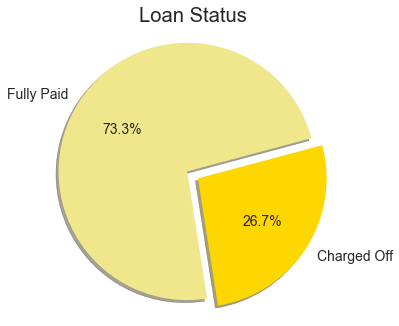

In [62]:
plt.figure(figsize=(5,5))
pie_ls = df['Loan Status'].value_counts()
name = ['Fully Paid','Charged Off']
colors = ['khaki','gold']
explode = (0, 0.1)
plt.pie(pie_ls, labels = name, autopct='%1.1f%%', startangle=15, shadow = True, colors=colors, explode=explode)
plt.title('Loan Status')
plt.axis('equal')
plt.show()

# 73,3% customer melunasi pinjamannya, 26,7% charged off

In [15]:
df.stb.freq(['Loan Status'], cum_cols = False)

,Loan Status,count,percent
0,Fully Paid,49569,73.3
1,Charged Off,18046,26.7


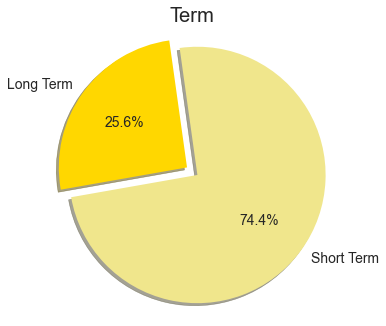

In [63]:
plt.figure(figsize=(5,5))
pie_t = df['Term'].value_counts()
name = ['Short Term','Long Term']
colors = ['khaki','gold']
explode = (0, 0.1)
plt.pie(pie_t, labels = name, autopct='%1.1f%%', startangle=190, shadow = True, colors=colors, explode=explode)
plt.title('Term')
plt.axis('equal')
plt.show()

# 74,4% pinjaman customer berjangka pendek, 25,6% berjangka panjang

In [17]:
df.stb.freq(['Term'], cum_cols = False)

,Term,count,percent
0,Short Term,50329,74.4
1,Long Term,17286,25.6


In [4]:
# mengkategorikan credit score berdasarkan FICO score rating range untuk melihat perbandingan tiap kategori
bins = [580,670,740,800]
label = ['fair','good','very good']
df['credit score rating']=pd.cut(df['Credit Score'],bins=bins,labels=label)

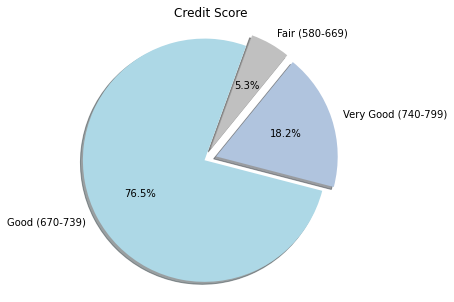

In [5]:
plt.figure(figsize=(5,5))
pie_cs = df['credit score rating'].value_counts()
name = ['Good (670-739)','Very Good (740-799)','Fair (580-669)']
colors = ['lightblue','lightsteelblue','silver']
explode = (0, 0.1, 0.1)
plt.pie(pie_cs, labels = name, autopct='%1.1f%%', startangle=70, shadow = True, colors=colors, explode=explode)
plt.title('Credit Score')
plt.axis('equal')
plt.show()

# kebanyakan credit score customer berada dalam kategori good(76,5%), paling sedikit kategori fair(5,3%)

In [43]:
df.stb.freq(['credit score rating'], cum_cols = False)

,credit score rating,count,percent
0,good,51732,76.5
1,very good,12293,18.2
2,fair,3590,5.3


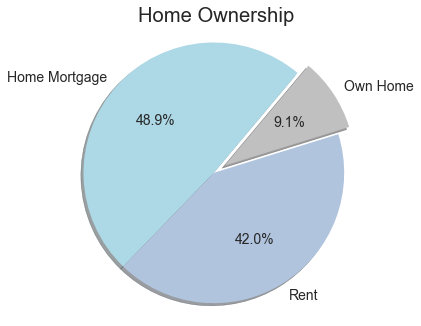

In [76]:
plt.figure(figsize=(5,5))
pie_ho = df['Home Ownership'].value_counts()
name = ['Home Mortgage','Rent','Own Home']
colors = ['lightblue','lightsteelblue','silver']
explode = (0, 0, 0.1)
plt.pie(pie_ho, labels = name, autopct='%1.1f%%', startangle=50, shadow = True, colors=colors, explode=explode)
plt.title('Home Ownership')
plt.axis('equal')
plt.show()

# hanya 9,1% customer yang memiliki rumah, 42% masih menyewa rumah dan 48,9% menjaminkan rumahnya

In [72]:
df.stb.freq(['Home Ownership'], cum_cols = False)

,Home Ownership,count,percent
0,Home Mortgage,33046,48.9
1,Rent,28416,42.0
2,Own Home,6153,9.1


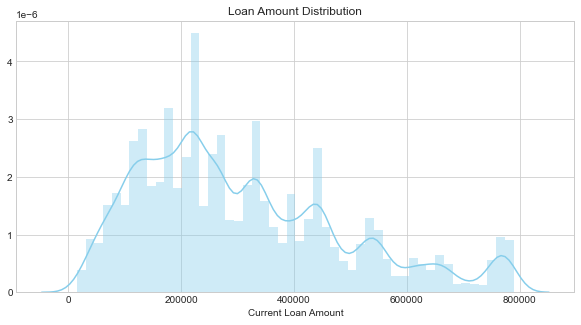

In [79]:
plt.figure(figsize = (10,5))
sns.distplot(df['Current Loan Amount'], color = 'skyblue')
plt.style.use('seaborn-whitegrid')
plt.title("Loan Amount Distribution")
plt.show()

# loan amount terbanyak bada kisaran 200 ribu

In [63]:
df['Current Loan Amount'].describe()

count    67615
mean    306791
std     182095
min      15422
25%     171105
50%     264814
75%     426569
max     789250
Name: Current Loan Amount, dtype: float64

In [65]:
bins = [0,50000,100000,250000,500000,1000000]
label = ['< 50k','50 - 100k','100 - 250k','250 - 500k','500k +']
df['loan amount bin']=pd.cut(df['Current Loan Amount'],bins=bins,labels=label)

# mengkategorikan loan amount untuk analisa tiap range loan amount

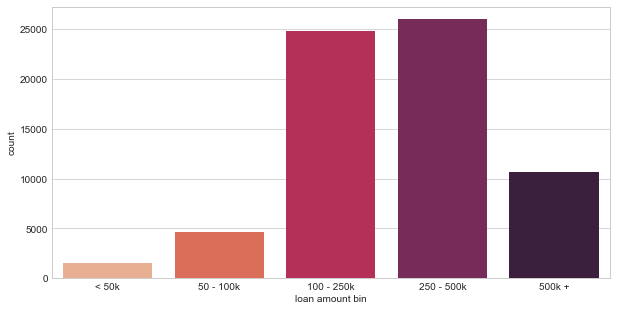

In [87]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['loan amount bin'], palette = 'rocket_r')
plt.show()

In [66]:
df.stb.freq(['loan amount bin'], cum_cols = False)

# loan amount peminjam terbanyak pada kisaran 100-500 ribu

,loan amount bin,count,percent
0,250 - 500k,25958,38
1,100 - 250k,24840,37
2,500k +,10683,16
3,50 - 100k,4631,7
4,< 50k,1503,2


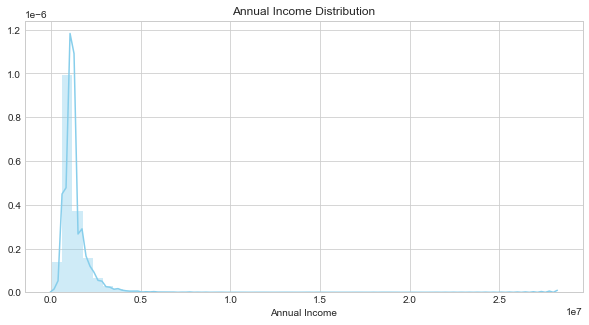

In [78]:
plt.figure(figsize = (10,5))
sns.distplot(df['Annual Income'], color = 'skyblue')
plt.style.use('seaborn-whitegrid')
plt.title('Annual Income Distribution')
plt.show()

# annual income customer tidak terdistribusi merata, terbanyak di kisaran 1 juta

In [53]:
df['Annual Income'].describe()

count      67615
mean     1323803
std       785884
min        76627
25%       953030
50%      1172718
75%      1457775
max     28095300
Name: Annual Income, dtype: float64

In [58]:
bins = [0,500000,1000000,1500000,2000000,30000000]
label = ['< 0.5m','0.5 - 1m','1 - 1.5m','1.5 - 2m','2m +']
df['income bin']=pd.cut(df['Annual Income'],bins=bins,labels=label)

# mengkategorikan annual income untuk analisa tiap range income

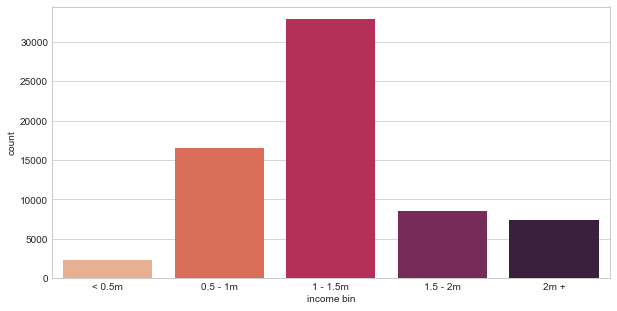

In [86]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['income bin'], palette = 'rocket_r')
plt.show()

In [59]:
df.stb.freq(['income bin'], cum_cols = False)

# hampir setengah (49%) annual income peminjam di kisaran 1-1,5 juta

,income bin,count,percent
0,1 - 1.5m,32816,49
1,0.5 - 1m,16533,24
2,1.5 - 2m,8594,13
3,2m +,7402,11
4,< 0.5m,2270,3


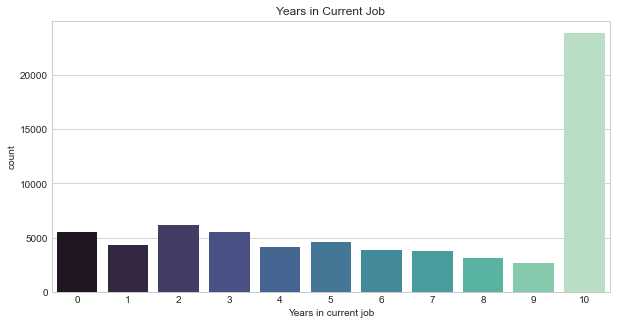

In [80]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
sns.countplot(df['Years in current job'], palette = 'mako')
plt.title('Years in Current Job')
plt.show()

# lama tahun pekerjaan customer didominasi 10 tahun keatas (35%)

In [100]:
df.stb.freq(['Years in current job'], cum_cols = False)

,Years in current job,count,percent
0,10,23778,35.2
1,2,6183,9.1
2,0,5556,8.2
3,3,5507,8.1
4,5,4650,6.9
5,1,4343,6.4
6,4,4174,6.2
7,6,3848,5.7
8,7,3755,5.6
9,8,3157,4.7


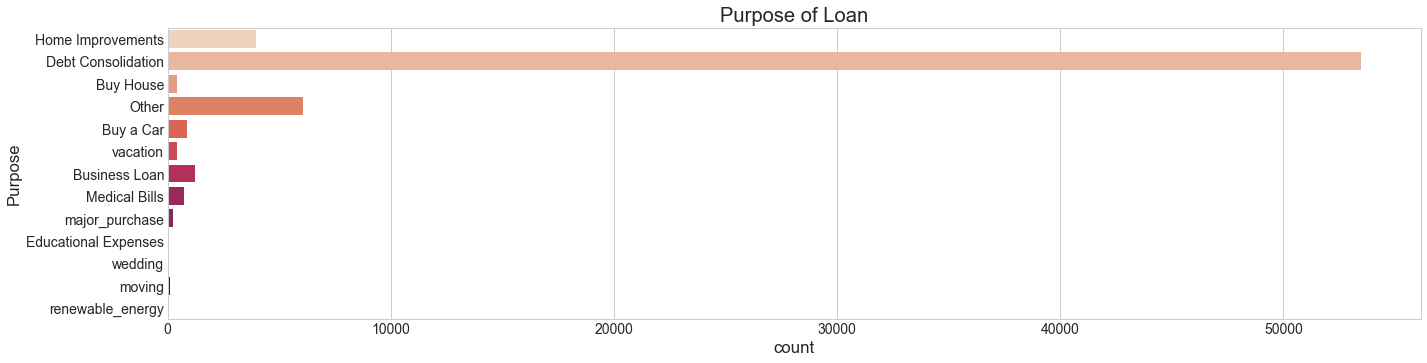

In [116]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-whitegrid')
sns.countplot(y=df['Purpose'], orient = 'v', palette = 'rocket_r')
plt.title('Purpose of Loan')
plt.show()

# kebanyakan tujuan dari pinjaman adalah untuk konsolidasi hutang (79,1%)

In [117]:
df.stb.freq(['Purpose'], cum_cols = False)

,Purpose,count,percent
0,Debt Consolidation,53473,79.1
1,Other,6045,8.9
2,Home Improvements,3944,5.8
3,Business Loan,1220,1.8
4,Buy a Car,871,1.3
5,Medical Bills,719,1.1
6,Buy House,431,0.6
7,vacation,429,0.6
8,major_purchase,247,0.4
9,moving,93,0.1


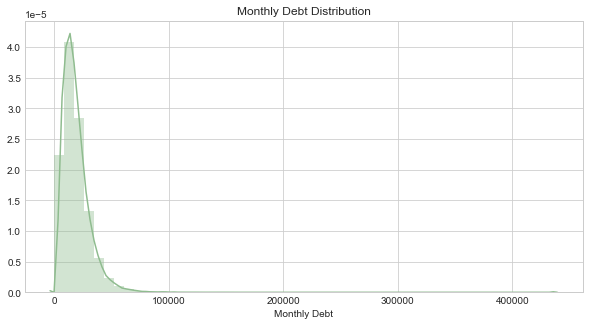

In [77]:
plt.figure(figsize = (10,5))
sns.distplot(df['Monthly Debt'], color = 'darkseagreen')
plt.style.use('seaborn-whitegrid')
plt.title('Monthly Debt Distribution')
plt.show()

# monthly debt customer tidak terdistribusi merata, terbanyak pada kisaran 10-20 ribu

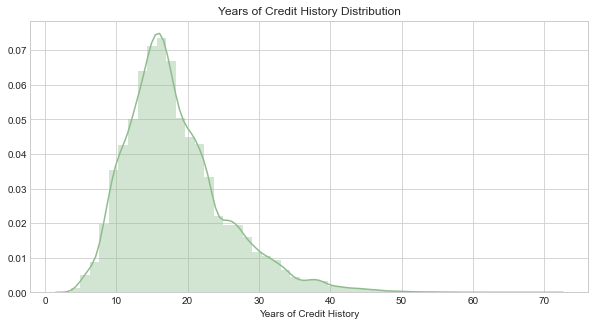

In [76]:
plt.figure(figsize = (10,5))
sns.distplot(df['Years of Credit History'], color = 'darkseagreen')
plt.style.use('seaborn-whitegrid')
plt.title('Years of Credit History Distribution')
plt.show()

# riwayat kredit customer terbanyak sekitar 15 tahun

In [85]:
df['Years of Credit History'].describe()

count   67615
mean       18
std         7
min         4
25%        14
50%        17
75%        22
max        70
Name: Years of Credit History, dtype: float64

In [69]:
bins = [0,5,10,15,20,100]
label = ['< 5','5 - 9','10 - 14','15 - 19','20 +']
df['credit history bin']=pd.cut(df['Years of Credit History'],bins=bins,labels=label)

# mengkategorikan years of credit history untuk analisa tiap range credit history

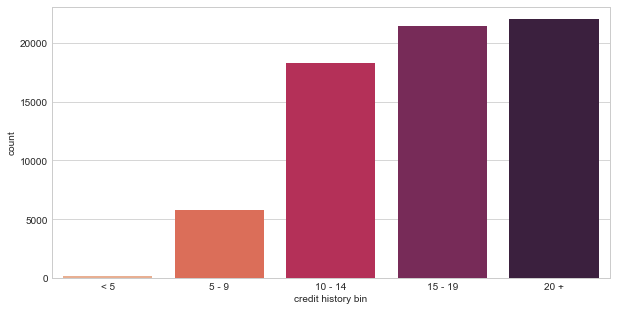

In [83]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['credit history bin'], palette = 'rocket_r')
plt.show()

In [70]:
df.stb.freq(['credit history bin'], cum_cols = False)

# mayoritas peminjam memiliki riwayat kredit diatas 15 tahun

,credit history bin,count,percent
0,20 +,21969,32
1,15 - 19,21403,32
2,10 - 14,18270,27
3,5 - 9,5815,9
4,< 5,158,0


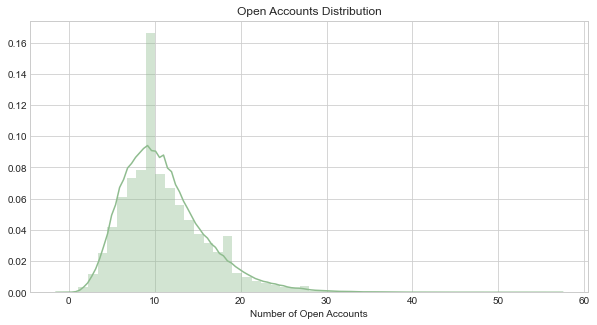

In [81]:
plt.figure(figsize = (10,5))
sns.distplot(df['Number of Open Accounts'], color = 'darkseagreen')
plt.style.use('seaborn-whitegrid')
plt.title('Open Accounts Distribution')
plt.show()

# jumlah akun customer terbanyak sekitar 10 akun

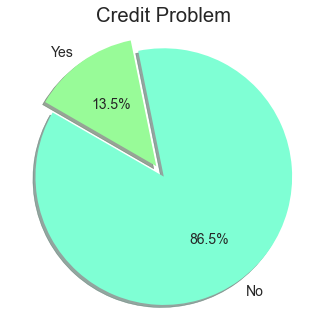

In [85]:
plt.figure(figsize=(5,5))
pie_cp = df['Credit Problems'].value_counts()
name = ['No','Yes']
colors = ['aquamarine','palegreen']
explode = (0, 0.1)
plt.pie(pie_cp, labels = name, autopct='%1.1f%%', startangle=150, shadow = True, colors=colors, explode=explode)
plt.title('Credit Problem')
plt.axis('equal')
plt.show()

# hanya 13,5% customer yang memiliki masalah kredit, 86,5% tidak

In [80]:
df.stb.freq(['Credit Problems'], cum_cols = False)

,Credit Problems,count,percent
0,0,58506,86.5
1,1,9109,13.5


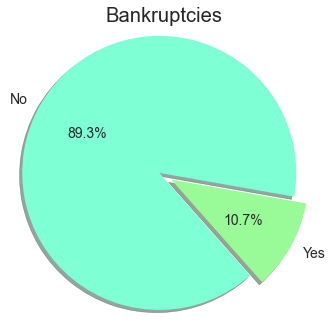

In [87]:
plt.figure(figsize=(5,5))
pie_b = df['Bankruptcies'].value_counts()
name = ['No','Yes']
colors = ['aquamarine','palegreen']
explode = (0, 0.1)
plt.pie(pie_b, labels = name, autopct='%1.1f%%', startangle=350, shadow = True, colors=colors, explode=explode)
plt.title('Bankruptcies')
plt.axis('equal')
plt.show()

# 10,7% customer pernah mengalami kebankrutan, 89,3% tidak

In [88]:
df.stb.freq(['Bankruptcies'], cum_cols = False)

,Bankruptcies,count,percent
0,0,60392,89.3
1,1,7223,10.7


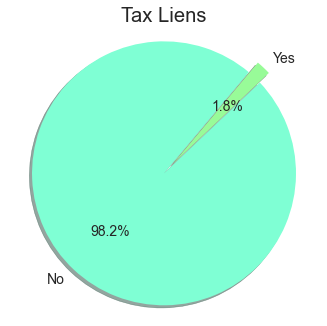

In [82]:
plt.figure(figsize=(5,5))
pie_tl = df['Tax Liens'].value_counts()
name = ['No','Yes']
colors = ['aquamarine','palegreen']
explode = (0, 0.1)
plt.pie(pie_tl, labels = name, autopct='%1.1f%%', startangle=50, shadow = True, colors=colors, explode=explode)
plt.title('Tax Liens')
plt.axis('equal')
plt.show()

# hanya 1,8% customer dengan tax liens, 98,2% tidak

In [83]:
df.stb.freq(['Tax Liens'], cum_cols = False)

,Tax Liens,count,percent
0,0,66385,98.2
1,1,1230,1.8


### Multivariate

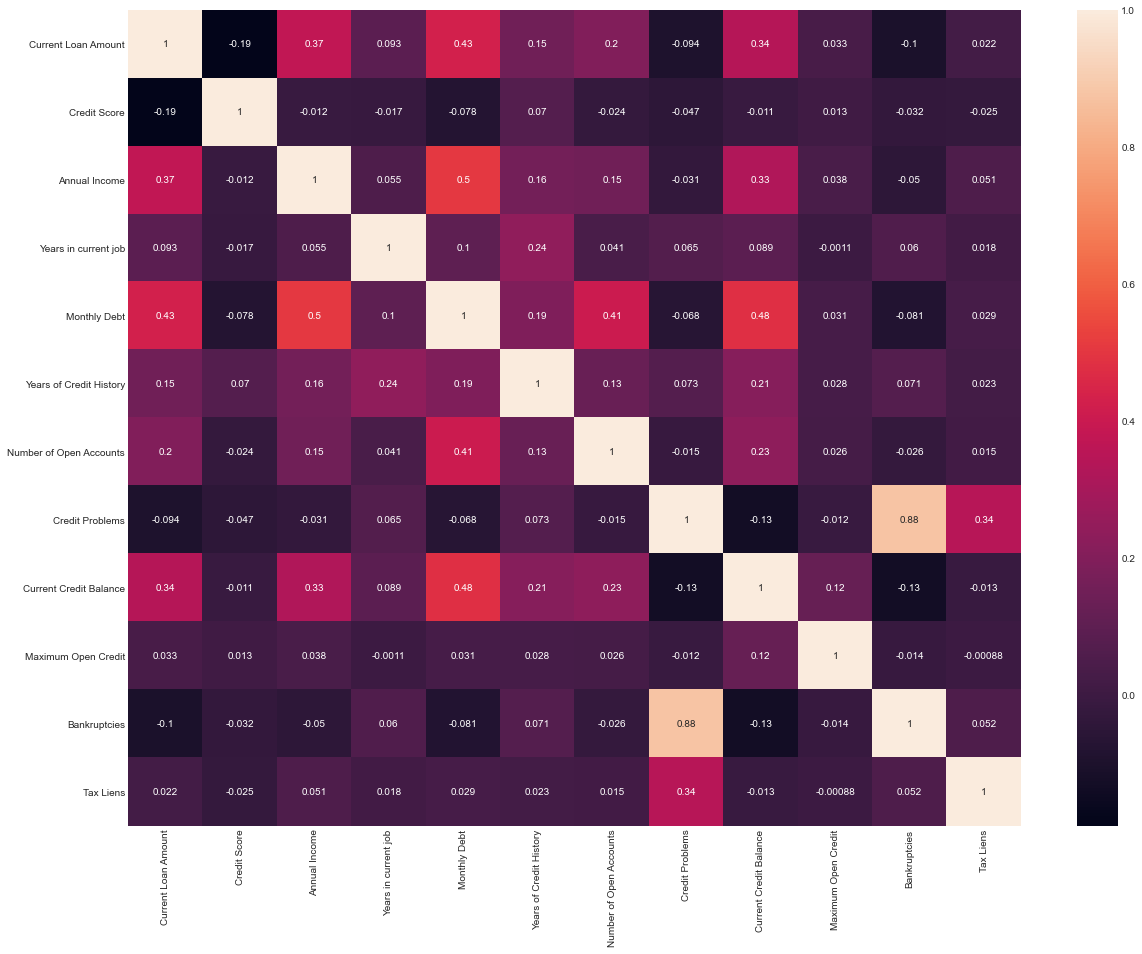

In [82]:
# korelasi antar features numerik
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# terdapat korelasi yang tinggi (0.88) antara bankruptcies dan credit problems
# selain itu tidak ada korelasi yang lebih dari 0.5 (monthly debt dan annual income)

In [133]:
plt.rcParams.update(plt.rcParamsDefault)

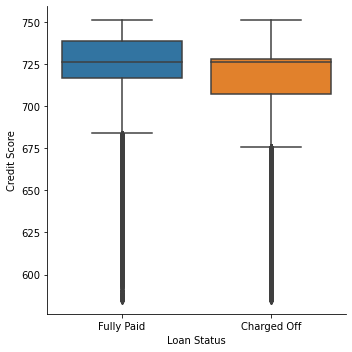

In [3]:
# membandingkan credit score terhadap loan status
sns.catplot(x = 'Loan Status', y = 'Credit Score', kind = 'box', data = df)
plt.show()

# customer yang fully paid cenderung memiliki credit score yang lebih tinggi dibanding customer yang charged off

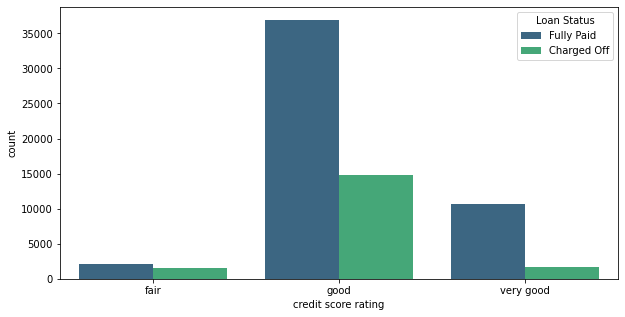

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['credit score rating'], hue = df['Loan Status'], palette = 'viridis')
plt.show()

In [8]:
pd.crosstab(df['Loan Status'], df['credit score rating'])

credit score rating,fair,good,very good
Loan Status,,,
Charged Off,1537,14823,1686
Fully Paid,2053,36909,10607


In [11]:
pd.crosstab(df['Loan Status'], df['credit score rating'], normalize = 'columns')*100

# semakin baik kategori credit score, semakin rendah persentase charged off

credit score rating,fair,good,very good
Loan Status,,,
Charged Off,43,29,14
Fully Paid,57,71,86


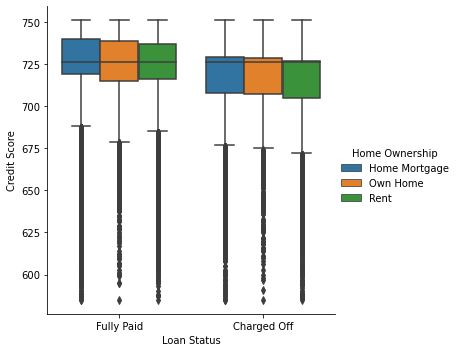

In [123]:
# membandingkan credit score terhadap loan status di tiap jenis home ownership
sns.catplot(x = 'Loan Status', y = 'Credit Score', hue = 'Home Ownership', kind = 'box', data = df)
plt.show()

# customer dengan home mortgage cenderung memiliki credit score lebih tinggi diikuti oleh own home dan rent

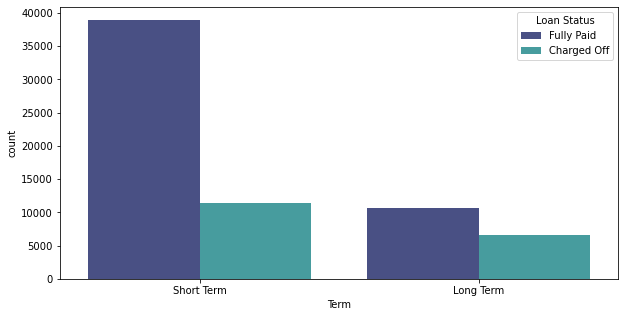

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Term'], hue = df['Loan Status'], palette = 'mako')
plt.show()

In [84]:
pd.crosstab(df['Loan Status'], df['Term'])

Term,Long Term,Short Term
Loan Status,,
Charged Off,6654,11392
Fully Paid,10632,38937


In [52]:
pd.crosstab(df['Loan Status'], df['Term'], normalize = 'columns')*100

# pinjaman berjangka panjang lebih tinggi kemungkinan charged off dibanding pinjaman jangka pandek

Term,Long Term,Short Term
Loan Status,,
Charged Off,38,23
Fully Paid,62,77


In [109]:
pd.crosstab(df['Term'], df['Purpose'], normalize = 'columns')*100

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,major_purchase,moving,renewable_energy,vacation,wedding
Term,,,,,,,,,,,,,
Long Term,28,27,22,26,10,28,17,19,24,15,29,8,16
Short Term,72,73,78,74,90,72,83,81,76,85,71,92,84


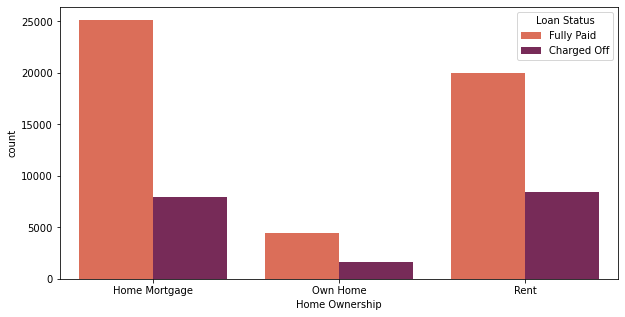

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Home Ownership'], hue = df['Loan Status'], palette = 'rocket_r')
plt.show()

In [19]:
pd.crosstab(df['Loan Status'], df['Home Ownership'])

Home Ownership,Home Mortgage,Own Home,Rent
Loan Status,,,
Charged Off,7914,1663,8469
Fully Paid,25132,4490,19947


In [20]:
pd.crosstab(df['Loan Status'], df['Home Ownership'], normalize = 'columns')*100

# persentase charged off paling tinggi di kategori rent, terendah di home mortgage

Home Ownership,Home Mortgage,Own Home,Rent
Loan Status,,,
Charged Off,24,27,30
Fully Paid,76,73,70


In [110]:
pd.crosstab(df['Term'], df['Home Ownership'], normalize = 'columns')*100

Home Ownership,Home Mortgage,Own Home,Rent
Term,,,
Long Term,30,24,20
Short Term,70,76,80


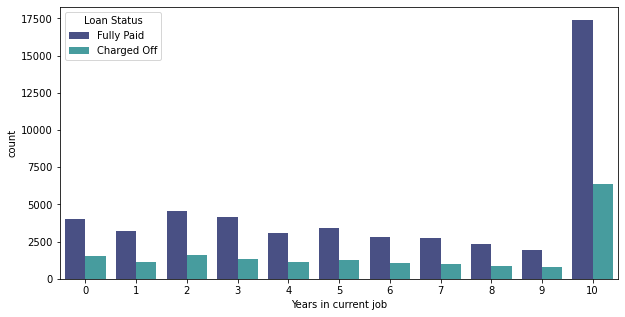

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Years in current job'], hue = df['Loan Status'], palette = 'mako')
plt.show()

In [15]:
pd.crosstab(df['Loan Status'], df['Years in current job'], normalize = 'columns')*100

# persentase charged off di tiap kategori tahun hampir sama

Years in current job,0,1,2,3,4,5,6,7,8,9,10
Loan Status,,,,,,,,,,,
Charged Off,28,27,26,25,27,27,27,27,27,29,27
Fully Paid,72,73,74,75,73,73,73,73,73,71,73


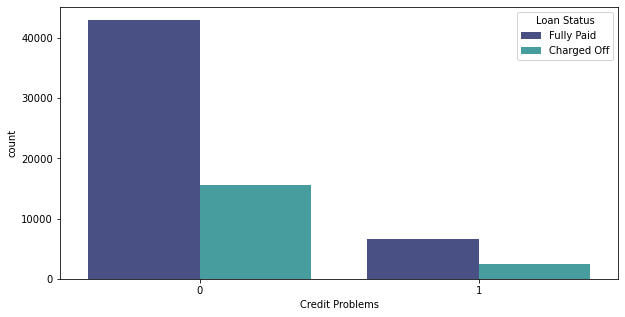

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Credit Problems'], hue = df['Loan Status'], palette = 'mako')
plt.show()

In [24]:
pd.crosstab(df['Loan Status'], df['Credit Problems'])

Credit Problems,0,1
Loan Status,,
Charged Off,15508,2538
Fully Paid,42998,6571


In [25]:
pd.crosstab(df['Loan Status'], df['Credit Problems'], normalize = 'columns')*100

# persentase charged off hampir sama antara customer yang memiliki masalah kredit dan tidak

Credit Problems,0,1
Loan Status,,
Charged Off,27,28
Fully Paid,73,72


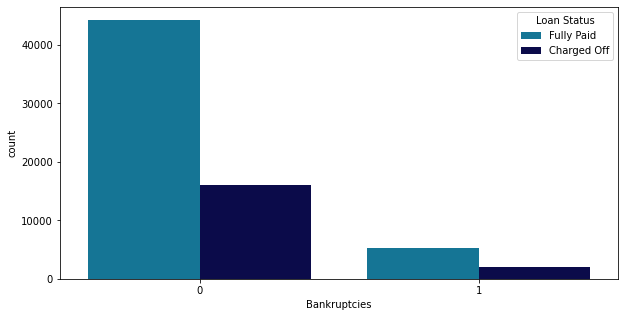

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Bankruptcies'], hue = df['Loan Status'], palette = 'ocean_r')
plt.show()

In [34]:
pd.crosstab(df['Loan Status'], df['Bankruptcies'])

Bankruptcies,0,1
Loan Status,,
Charged Off,16110,1936
Fully Paid,44282,5287


In [36]:
pd.crosstab(df['Loan Status'], df['Bankruptcies'], normalize = 'columns')*100

# persentase charged off sama antara customer yang pernah bangkrut dan tidak

Bankruptcies,0,1
Loan Status,,
Charged Off,27,27
Fully Paid,73,73


In [40]:
pd.crosstab(df['Loan Status'], df['Tax Liens'], normalize = 'columns')*100

# persentase charged off lebih tinggi pada kategori customer dengan tax liens

Tax Liens,0,1
Loan Status,,
Charged Off,27,31
Fully Paid,73,69


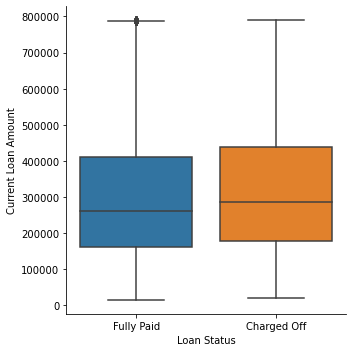

In [124]:
# membandingkan current loan amount terhadap loan status
sns.catplot(x = 'Loan Status', y = 'Current Loan Amount', kind = 'box', data = df)
plt.show()

# customer yang charged off cenderung memiliki loan amount yang lebih tinggi dibanding customer yang fully paid

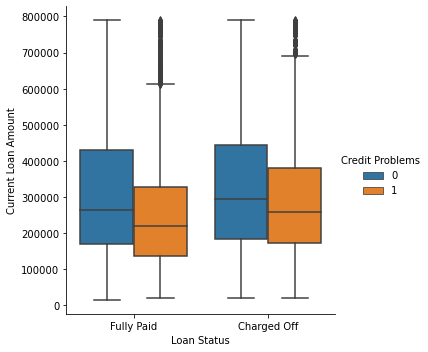

In [122]:
# membandingkan current loan amount terhadap loan status dengan ada/tidak credit problems
sns.catplot(x = 'Loan Status', y = 'Current Loan Amount', hue = 'Credit Problems', kind = 'box', data = df)
plt.show()

# customer dengan credit problems cenderung memiliki loan amount yang lebih rendah dibanding customer tanpa credit problems

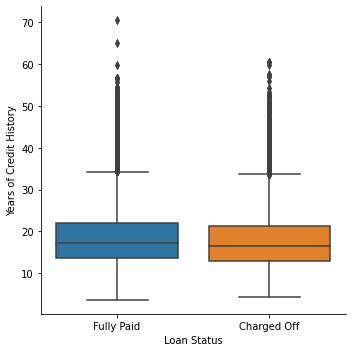

In [126]:
# membandingkan years of credit history terhadap loan status
sns.catplot(x = 'Loan Status', y = 'Years of Credit History', kind = 'box', data = df)
plt.show()

# perbandingan years of credit history terhadap loan status tidak banyak
# years of credit history customer yang charged off cenderung sedikit lebih rendah

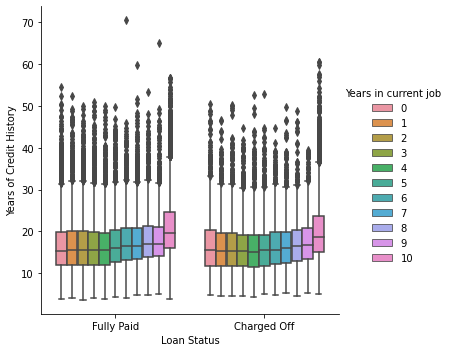

In [130]:
# membandingkan years of credit history terhadap loan status pada tiap years in current job
sns.catplot(x = 'Loan Status', y = 'Years of Credit History', hue = 'Years in current job', kind = 'box', data = df)
plt.show()

# customer dengan years in current job 10 tahun atau lebih memiliki years of credit history paling tinggi

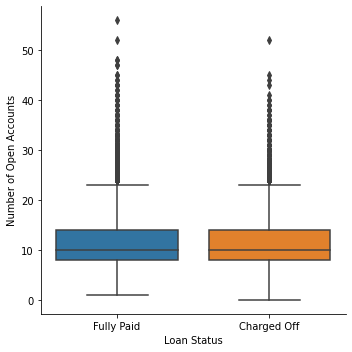

In [8]:
sns.catplot(x = 'Loan Status', y = 'Number of Open Accounts', kind = 'box', data = df)
plt.show()

# perbandingan number of open accounts terhadap loan status hampir sama antara fully paid dan charged off

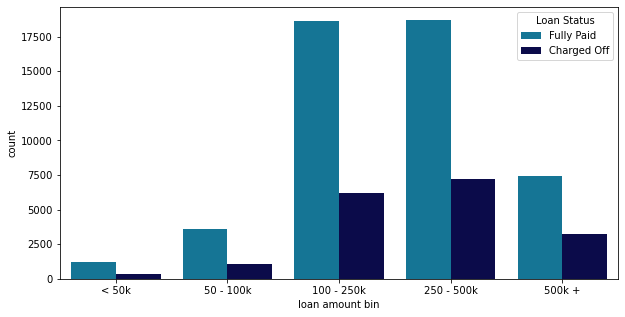

In [67]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['loan amount bin'], hue = df['Loan Status'], palette = 'ocean_r')
plt.show()

In [68]:
pd.crosstab(df['Loan Status'], df['loan amount bin'], normalize = 'columns')*100

# semakin besar loan amount, semakin besar kemungkinan charged off

loan amount bin,< 50k,50 - 100k,100 - 250k,250 - 500k,500k +
Loan Status,,,,,
Charged Off,21,23,25,28,30
Fully Paid,79,77,75,72,70


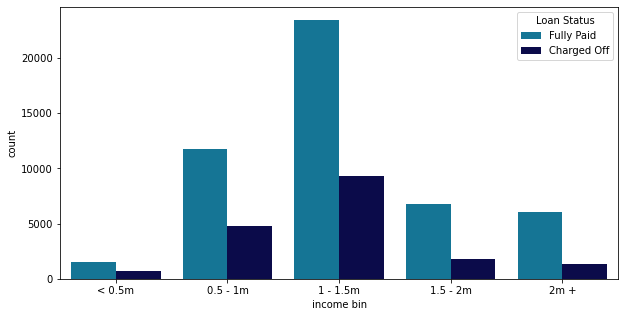

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['income bin'], hue = df['Loan Status'], palette = 'ocean_r')
plt.show()

In [61]:
pd.crosstab(df['Loan Status'], df['income bin'], normalize = 'columns')*100

# semakin besar annual income, semakin kecil kemungkinan charged off

income bin,< 0.5m,0.5 - 1m,1 - 1.5m,1.5 - 2m,2m +
Loan Status,,,,,
Charged Off,32,29,29,21,18
Fully Paid,68,71,71,79,82


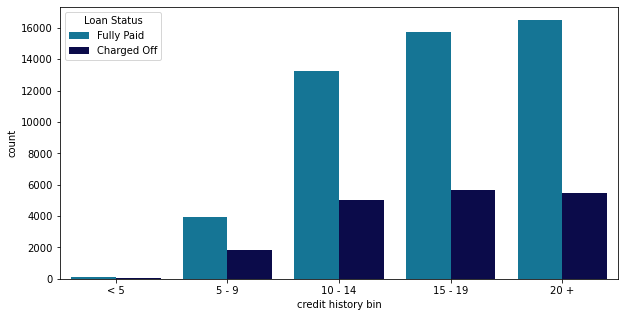

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['credit history bin'], hue = df['Loan Status'], palette = 'ocean_r')
plt.show()

In [72]:
pd.crosstab(df['Loan Status'], df['credit history bin'], normalize = 'columns')*100

# semakin lama riwayat kredit, semakin kecil kemungkinan charged off

credit history bin,< 5,5 - 9,10 - 14,15 - 19,20 +
Loan Status,,,,,
Charged Off,23,32,28,27,25
Fully Paid,77,68,72,73,75
